<img src="Clustering.jpg" width="1000" />

# **Penguins Species Clustering**

Penguin species segmentation is a crucial approach in zoological studies, enabling researchers to unravel how different penguin groups respond to various environmental factors and what influences their behaviors. By categorizing penguin populations into distinct clusters based on their characteristics and habits, scientists can refine their conservation strategies for each group. In this project, we've applied a clustering algorithm to categorize penguin species based on their responses to environmental changes, their habitat preferences, and their breeding habits. We've then delved into each cluster to discern patterns and trends, such as breeding success rates, habitat preferences, and population sizes. This analysis provides valuable insights into the diverse behaviors of penguin species, informing conservation efforts and contributing to a better understanding of these fascinating creatures.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import colors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

### **Penguins Segmentation Personality Analysis Dataset and Setup**
To prepare this dataset to enter the clustering process, since this dataset contains a detailed analysis of several types of penguins species and does not have a label of what kind of penguins they are, I wanted to make clustering and concluded that with clusters I could find out the types of penguins, especially to find out some of the ways they survive and breed.

The following cleaning steps were conducted:
1. Renaming the columns to make it more readable
2. Removing missing values on all columns
3. Get rid of some outliers

The following feature engineering steps were conducted:

Create new Columns

1. BMI (Body Mass Index): <br>
Calculation: Body Mass Index is computed by dividing "Body Massa" by the product of "Culmen Depth" and "Culmen Length."<br>
Insight: BMI is a measure often used in human health to assess body mass relative to height. In this context, it provides a relative measure of body mass in relation to the penguin's beak dimensions.

2. Ponderal Index:<br>
Calculation: Ponderal Index is calculated by dividing "Body Massa" by the cube of "Culmen Length."<br>
Insight: Similar to BMI, the Ponderal Index is another measure used to assess body mass relative to linear dimensions, emphasizing the cubic dimension of the penguin's beak length.

3. Culmen Ratio:<br>
Calculation: Culmen Ratio is obtained by multiplying "Culmen Length" and "Culmen Depth."<br>
Insight: This ratio provides an indication of the relationship between the length and depth of the penguin's beak, offering insights into beak proportions.

4. Relative Culmen Length:<br>
Calculation: Relative Culmen Length is computed by dividing "Culmen Length" by "Flipper Length."<br>
Insight: It represents the ratio of the length of the beak to the length of the flipper, providing information about the relative size of the beak in comparison to the flipper.

5. Relative Flipper Length:<br>
Calculation: Relative Flipper Length is obtained by dividing "Flipper Length" by "Culmen Length."<br>
Insight: This ratio provides information about the relative size of the flipper in comparison to the length of the beak.

6. BM/FL (Body Mass to Flipper Length Ratio):<br>
Calculation: BM/FL is calculated by dividing "Body Massa" by "Flipper Length."<br>
Insight: It represents the ratio of body mass to flipper length, offering insights into the proportional relationship between body mass and flipper size.

7. BM/CL (Body Mass to Culmen Length Ratio):<br>
Calculation: BM/CL is obtained by dividing "Body Massa" by "Culmen Length."<br>
Insight: This ratio provides information about the proportional relationship between body mass and the length of the penguin's beak.

8. Overall Size:<br>
Calculation: Overall Size is the sum of "Culmen Length," "Culmen Depth," "Body Massa," and "Flipper Length."<br>
Insight: It represents a cumulative measure of various physical dimensions, offering a holistic view of the overall size of the penguin.

These additional columns introduce various metrics that provide insights into the size, proportions, and relationships between different physical attributes of the penguins in the dataset.

In [180]:
df = pd.read_csv('dataset/penguins.csv')

### Renaming the columns to make it more readable

In [181]:
# Rename columns
df = df.rename(columns={"culmen_length_mm": "Culmen Length",
                        "culmen_depth_mm":"Culmen Depth",
                        "flipper_length_mm":"Flipper Length",
                        "body_mass_g":"Body Massa",
                        "sex" : "Sex"})

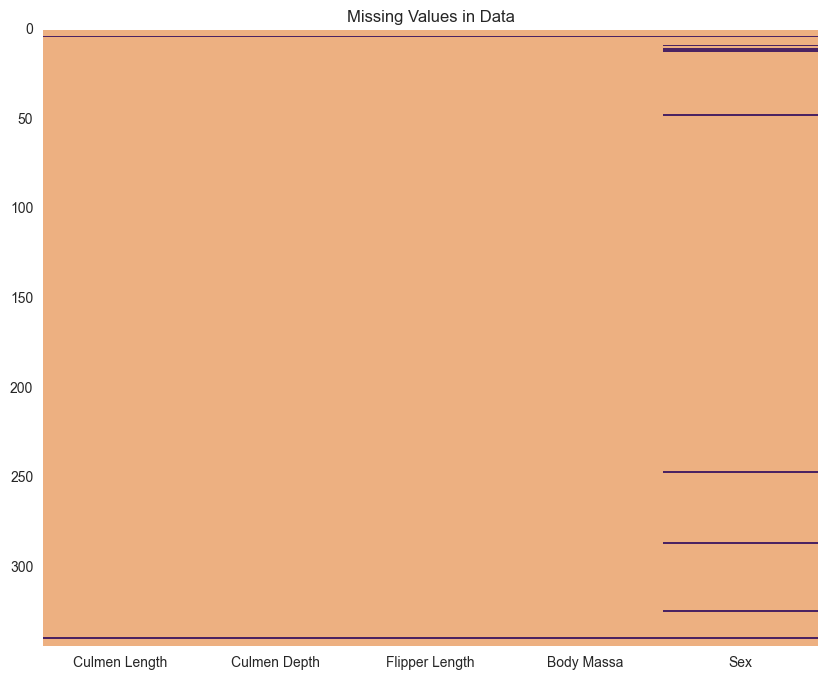

In [182]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='flare')

yticks_values = range(0, len(df), 50)
heatmap.set_yticks(yticks_values)
heatmap.set_yticklabels(yticks_values)
plt.title("Missing Values in Data")
plt.show()

### Removing Columns if have Missing Value

In [183]:
df.dropna(how="all", inplace=True)
df.replace(".", np.nan, inplace=True)
df['Sex'] = df['Sex'].map({'MALE': 1, 'FEMALE': 0})
df['Sex'] = pd.to_numeric(df['Sex'], errors='coerce').astype('Int32')
df.dropna(inplace=True)

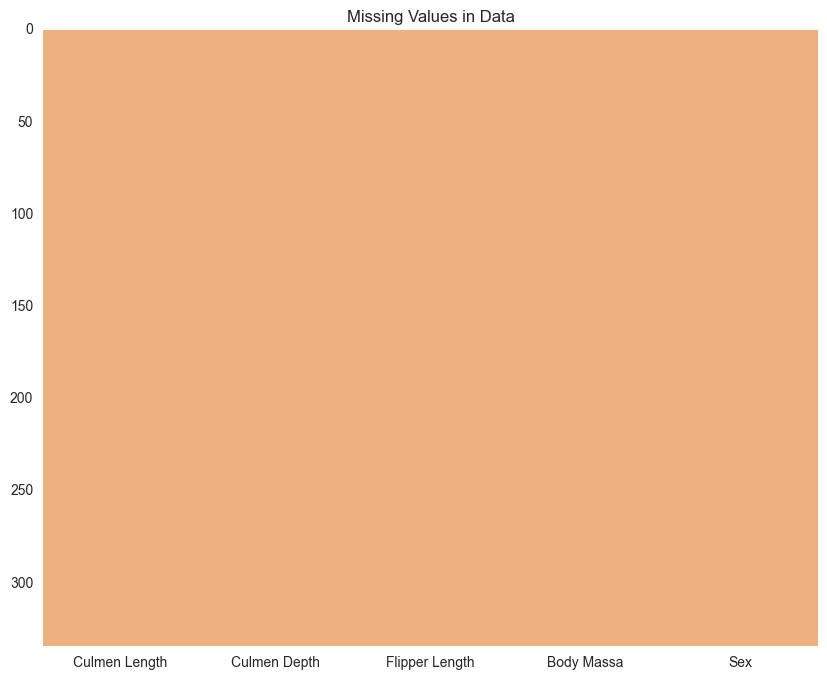

In [184]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='flare')

yticks_values = range(0, len(df), 50)
heatmap.set_yticks(yticks_values)
heatmap.set_yticklabels(yticks_values)
plt.title("Missing Values in Data")
plt.show()

### Create new columns

In [185]:
df["BMI"] = df["Body Massa"]/(df['Culmen Depth']*df['Culmen Length'])
df['Ponderal Index'] = df['Body Massa'] / (df['Culmen Length'] ** 3)
df['Culmen Rasio'] = df['Culmen Length'] * df ['Culmen Depth']
df['Relative Culmen Length'] = df['Culmen Length'] / df['Flipper Length']
df['Relative Flipper Length'] =  df['Flipper Length'] / df['Culmen Length']
df['BM/FL'] = df['Body Massa'] / df['Flipper Length']
df['BM/CL'] = df['Body Massa'] / df['Culmen Length']
df['Overall Size'] = df['Culmen Length'] + df['Culmen Depth'] + df['Body Massa'] + df['Flipper Length']
df.head(10)

Culmen Length  Culmen Depth  Flipper Length  Body Massa  Sex       BMI  \
0            39.1          18.7           181.0      3750.0    1  5.128766   
1            39.5          17.4           186.0      3800.0    0  5.528881   
2            40.3          18.0           195.0      3250.0    0  4.480287   
4            36.7          19.3           193.0      3450.0    0  4.870749   
5            39.3          20.6           190.0      3650.0    1  4.508511   
6            38.9          17.8           181.0      3625.0    0  5.235262   
7            39.2          19.6           195.0      4675.0    1  6.084704   
9            42.0          20.2          5000.0      4250.0    1  5.009430   
12           41.1          17.6           182.0      3200.0    0  4.423800   
13           38.6          21.2           191.0      3800.0    1  4.643660   

    Ponderal Index  Culmen Rasio  Relative Culmen Length  \
0         0.062734        731.17                0.216022   
1         0.061658        687.30                0.212366   
2         0.049656        725.40                0.206667   
4         0.069794        708.31                0.190155   
5         0.060133        809.58                0.206842   
6         0.061583        692.42                0.214917   
7         0.077611        768.32                0.201026   
9         0.057364        848.40                0.008400   
12        0.046092        723.36                0.225824   
13        0.066073        818.32                0.202094   

    Relative Flipper Length      BM/FL       BM/CL  Overall Size  
0                  4.629156  20.718232   95.907928        3988.8  
1                  4.708861  20.430108   96.202532        4042.9  
2                  4.838710  16.666667   80.645161        3503.3  
4                  5.258856  17.875648   94.005450        3699.0  
5                  4.834606  19.210526   92.875318        3899.9  
6                  4.652956  20.027624   93.187661        3862.7  
7                  4.974490  23.974359  119.260204        4928.8  
9                119.047619   0.850000  101.190476        9312.2  
12                 4.428224  17.582418   77.858881        3440.7  
13                 4.948187  19.895288   98.445596        4050.8

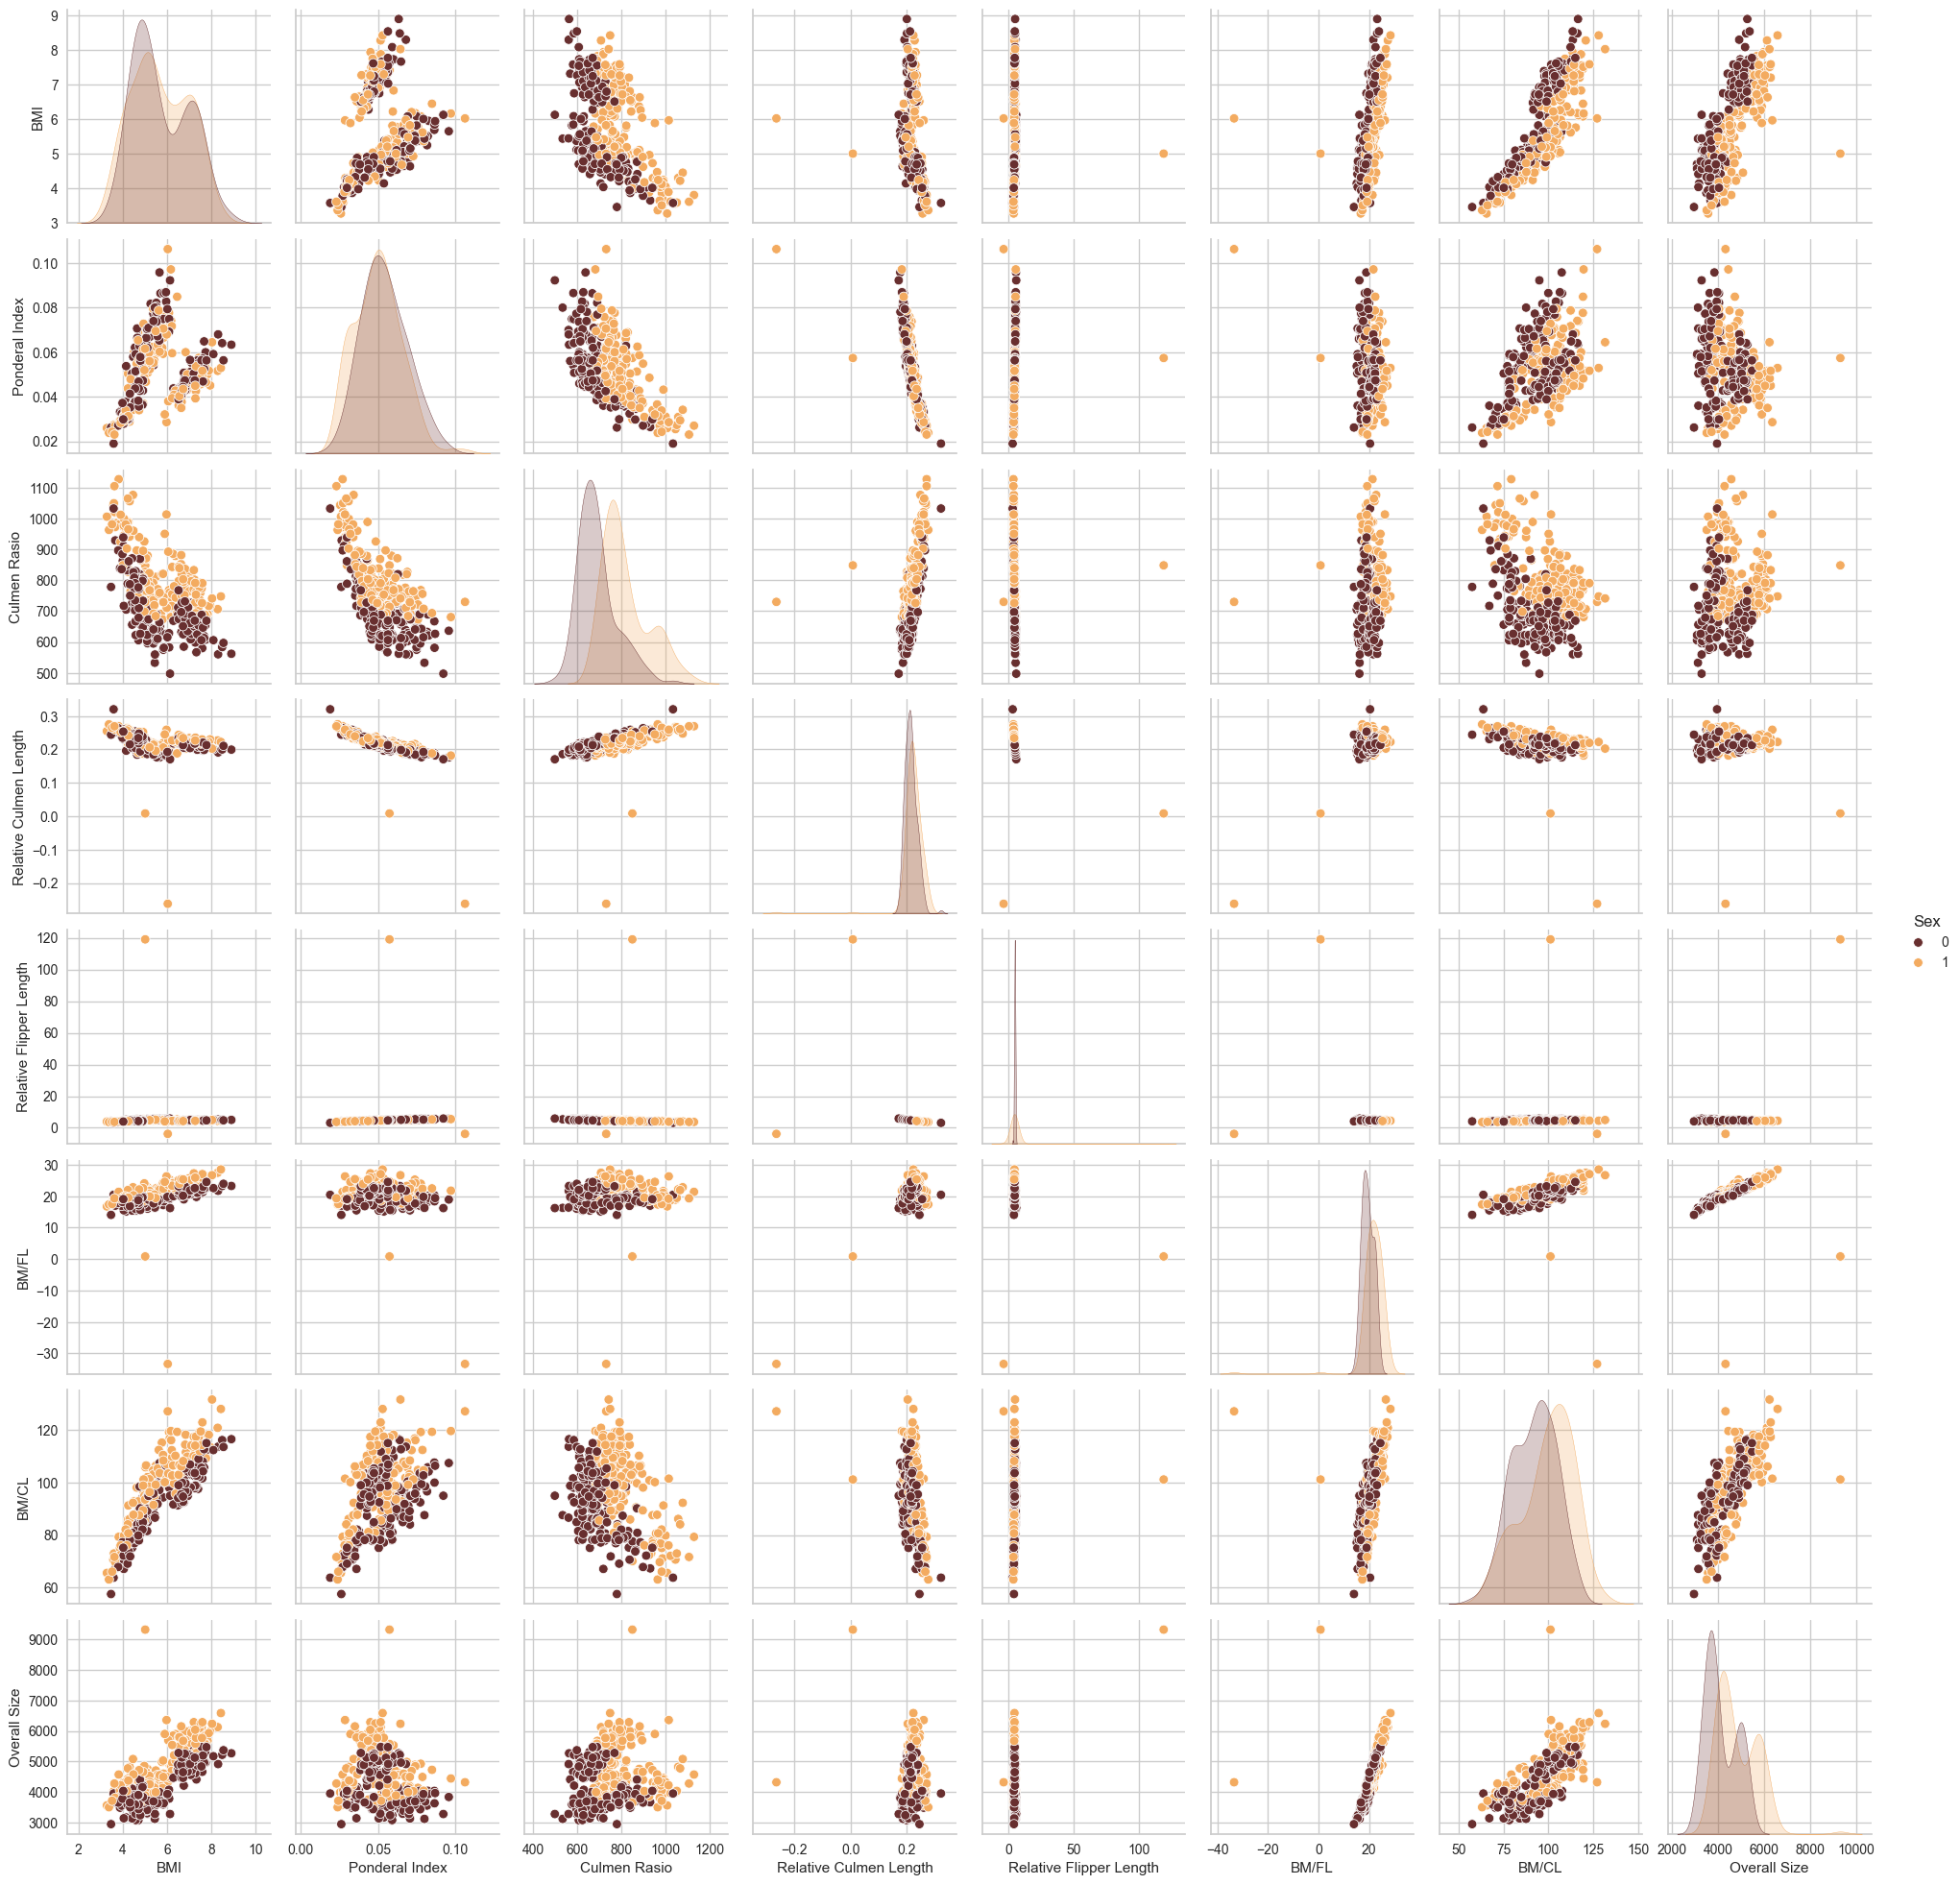

In [186]:
To_Plot = ["BMI", "Ponderal Index", "Culmen Rasio",
           "Relative Culmen Length", "Relative Flipper Length",
           "BM/FL", "BM/CL", "Overall Size","Sex"]

sns.pairplot(df[To_Plot], hue='Sex', palette=["#682F2F", "#F3AB60"], dropna=True)

plt.show()

### Get rid of some outliers<br>

1. Overall Size Filter:
Condition: Keep rows where "Overall Size" is less than 7000.
Insight: This filter retains penguins with an overall size below a certain threshold.

2. Relative Culmen Length Filter:
Condition: Keep rows where "Relative Culmen Length" is greater than 0.0 and less than 0.25.
Insight: Retains penguins with a specific range of relative beak length compared to flipper length.

3. Relative Flipper Length Filter:
Condition: Keep rows where "Relative Flipper Length" is less than 5.5.
Insight: Retains penguins with a specific range of relative flipper length compared to beak length.

4. BM/FL (Body Mass to Flipper Length Ratio) Filter:
Condition: Keep rows where "BM/FL" is greater than 15.
Insight: Retains penguins with a specific ratio of body mass to flipper length.

5. Culmen Rasio (Culmen Ratio) Filter:
Condition: Keep rows where "Culmen Rasio" is between 500 and 950.
Insight: Retains penguins with a specific range of beak length to beak depth ratio.

6. Ponderal Index Filter:
Condition: Keep rows where "Ponderal Index" is less than 0.09.
Insight: Retains penguins with a specific ponderal index, which is a measure of body mass in relation to beak dimensions.

7. Flipper Length Filters:
Conditions: Keep rows where "Flipper Length" is less than or equal to 4500 and greater than or equal to 0.
Insight: Retains penguins with a specific range of flipper lengths.

These filters collectively refine your dataset by retaining rows that meet specified criteria related to overall size, relative beak and flipper lengths, body mass ratios, culmen ratios, ponderal index, and flipper lengths. The resulting DataFrame is a subset that satisfies these conditions.

In [187]:
df = df[df['Overall Size'] < 7000]
df = df[(df['Relative Culmen Length'] > 0.0) & (df['Relative Culmen Length'] < 0.25)]
df = df[(df['Relative Flipper Length'] < 5.5)]
df = df[df['BM/FL'] > 15]
df = df[(df['Culmen Rasio'] > 500) & (df['Culmen Rasio'] < 950)]
df = df[df['Ponderal Index'] < 0.09]
df = df[(df["Flipper Length"] <= 4500)]
df = df[(df["Flipper Length"] >= 0)]

### BoxPlot to know some Outliers

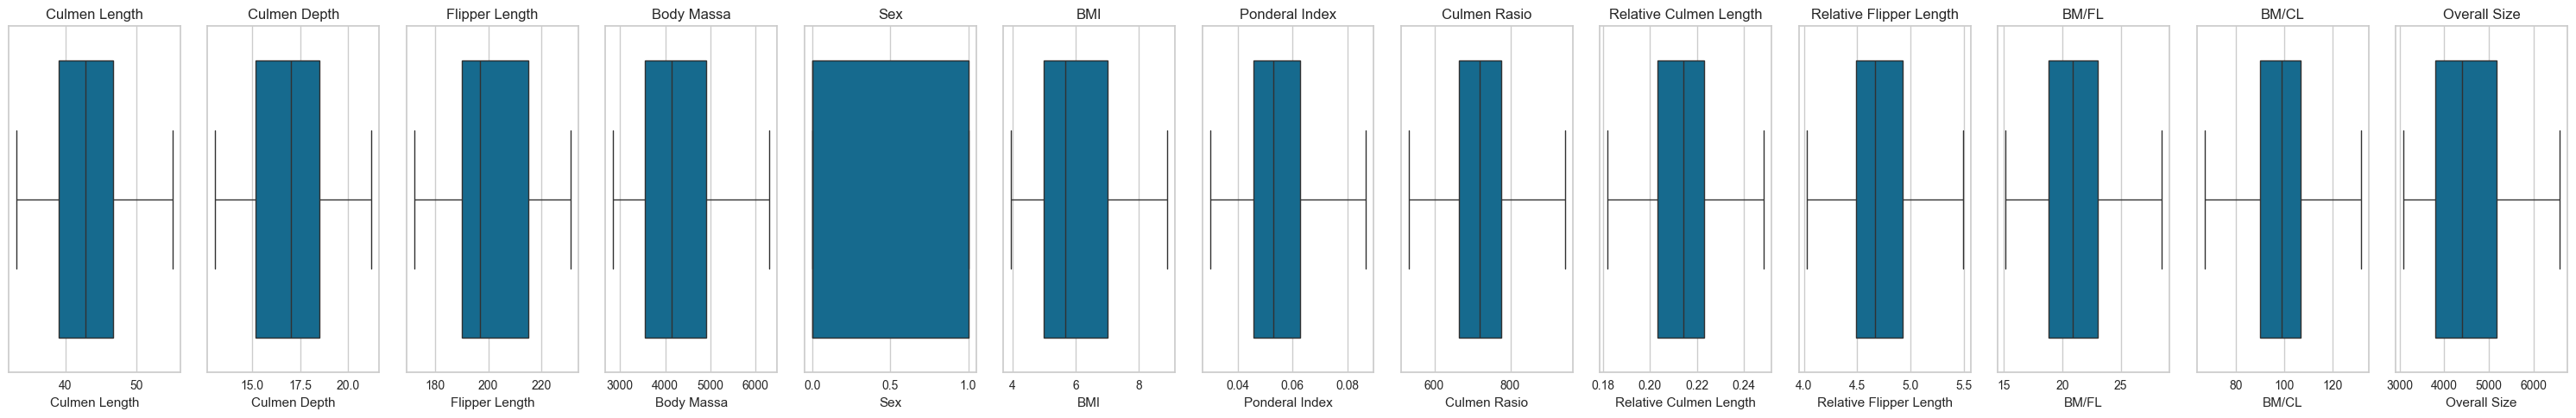

In [188]:
numeric_columns = df.columns

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(30,5))

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### Corelation 

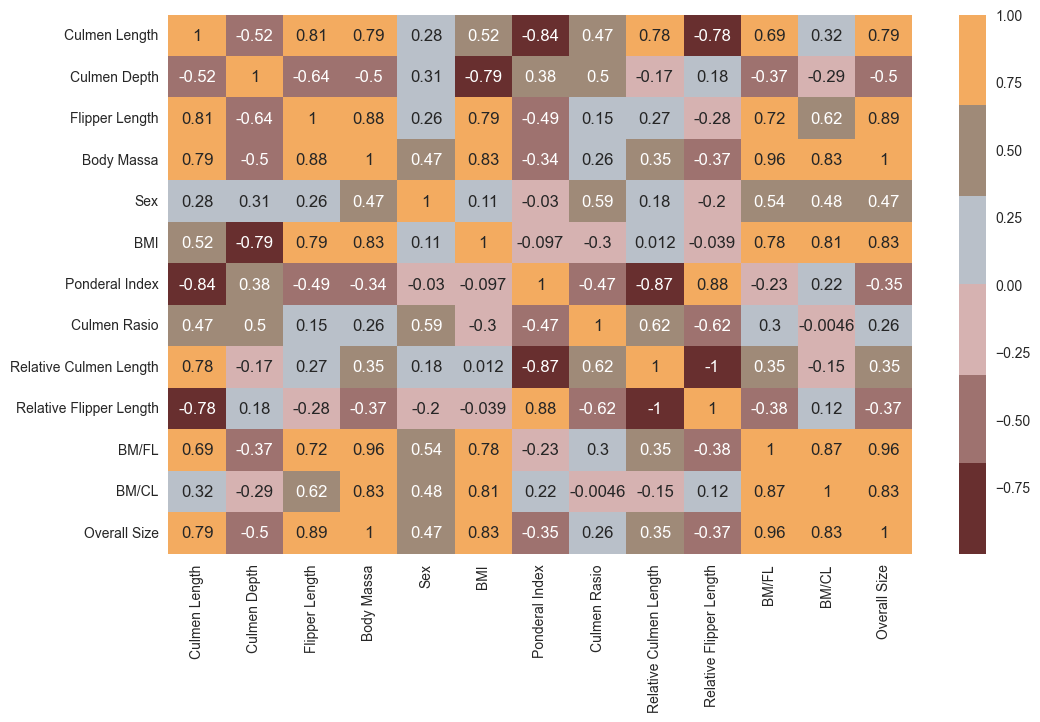

In [189]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Select only float columns for correlation matrix
corrmat = df.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.show()

In [190]:
def get_redundant_pairs(X):
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations:")
print(get_top_abs_correlations(df.select_dtypes(include=['float']), 15))

Top Absolute Correlations:
Body Massa              Overall Size               0.999956
Relative Culmen Length  Relative Flipper Length    0.996316
Body Massa              BM/FL                      0.962610
BM/FL                   Overall Size               0.960271
Flipper Length          Overall Size               0.885509
                        Body Massa                 0.881452
Ponderal Index          Relative Flipper Length    0.875143
                        Relative Culmen Length     0.871369
BM/FL                   BM/CL                      0.871146
Culmen Length           Ponderal Index             0.839227
Body Massa              BMI                        0.834061
                        BM/CL                      0.833788
BMI                     Overall Size               0.833293
BM/CL                   Overall Size               0.830141
Culmen Length           Flipper Length             0.814093
dtype: float64


In [191]:
cat_cols= [cat for cat in df if df[cat].dtype in (["object"])]

#Label Encoding the object dtypes.
ds = df.copy()
LE=LabelEncoder()
for i in cat_cols:
    ds[i]=ds[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


## **Data Pre-Processing**
The following steps are applied to preprocess the data:

1. Label encoding the categorical features, clustering algorithms require numerical data for computation
2. Scaling the features using the standard scaler
3. Creating a subset dataframe for dimensionality reduction
4. Dimensionality Reduction, we're going to use Principal component analysis (PCA). It's a technique for reducing the dimensionality of such datasets, increasing interpretability but, at the same time, minimizing information loss.
### Scaler all columns except Sex

In [192]:
# Select numeric columns
numeric_columns = df.drop('Sex', axis=1).columns

# Create a StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
scaled_data = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
scaled_data

Culmen Length  Culmen Depth  Flipper Length  Body Massa       BMI  \
0        -0.818360      0.953642       -1.394302   -0.610837 -0.694916   
1        -0.735775      0.276947       -1.051876   -0.550476 -0.351194   
2        -0.570606      0.589267       -0.435508   -1.214448 -1.251998   
3        -1.313869      1.265963       -0.572479   -0.973003 -0.916568   
4        -0.777068      1.942658       -0.777935   -0.731559 -1.227752   
..             ...           ...             ...         ...       ...   
279       0.853982     -1.649033        0.865712    0.807648  1.442014   
280       0.771397     -1.336712        0.934197    0.717106  1.124792   
281       1.514660     -0.607963        1.413594    1.803606  1.141699   
282       0.441058     -1.076444        0.728741    1.139634  1.576857   
283       1.411429     -0.399749        0.797226    1.381078  0.673349   

     Ponderal Index  Culmen Rasio  Relative Culmen Length  \
0          0.659772      0.119314                0.164751   
1          0.571902     -0.424935               -0.081893   
2         -0.408918      0.047732               -0.466306   
3          1.236746     -0.164286               -1.580045   
4          0.447279      1.092065               -0.454472   
..              ...           ...                     ...   
279       -0.639320     -0.929361                0.470899   
280       -0.600134     -0.648987                0.276206   
281       -0.796428      0.865036                0.907072   
282        0.134879     -0.652460               -0.025100   
283       -0.915177      1.015272                1.395790   

     Relative Flipper Length     BM/FL     BM/CL  Overall Size  
0                  -0.230106 -0.095537 -0.203371     -0.626084  
1                   0.012225 -0.197538 -0.179249     -0.561992  
2                   0.407011 -1.529863 -1.453087     -1.201254  
3                   1.684402 -1.101862 -0.359146     -0.969409  
4                   0.394533 -0.629291 -0.451682     -0.731404  
..                       ...       ...       ...           ...  
279                -0.519723  0.717213  0.487311      0.808701  
280                -0.336941  0.555823  0.429115      0.721270  
281                -0.912343  1.739221  1.285156      1.801713  
282                -0.044312  1.253296  1.363511      1.131057  
283                -1.326514  1.544940  0.804449      1.376289  

[284 rows x 12 columns]

In [193]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  284.0  0.000000e+00  2.604129 -4.959498 -2.193232 -0.324205  2.202969   
col2  284.0 -3.752867e-17  1.827510 -4.183812 -1.185178 -0.154400  0.933129   
col3  284.0 -5.003822e-17  1.215777 -2.528854 -0.907744 -0.078026  0.848817   

           max  
col1  5.432772  
col2  5.548176  
col3  3.129766

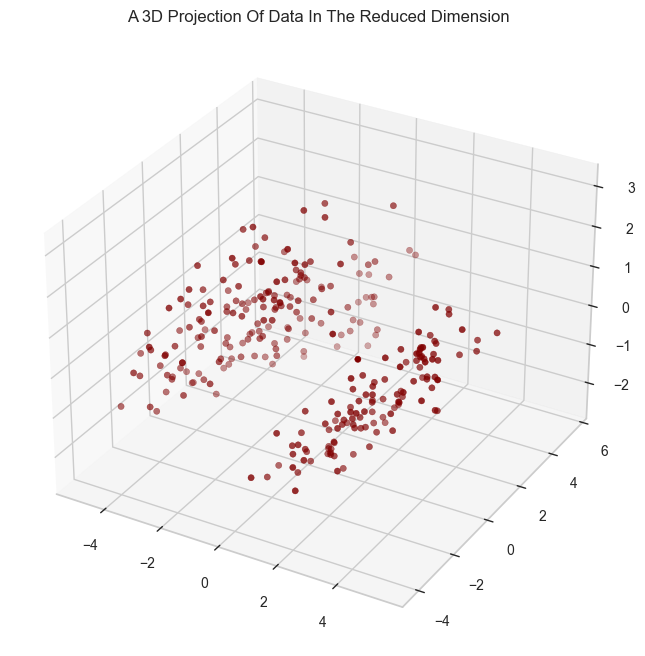

In [194]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## **Clustering**

**Steps involved in the Clustering:**

1. Elbow Method to determine the number of clusters to be formed
2. Clustering via K-Means Clustering, it's centroid clustering method.
3. Examining the clusters formed via scatter plot

### Elbow Method

Elbow Method to determine the number of clusters to be formed:


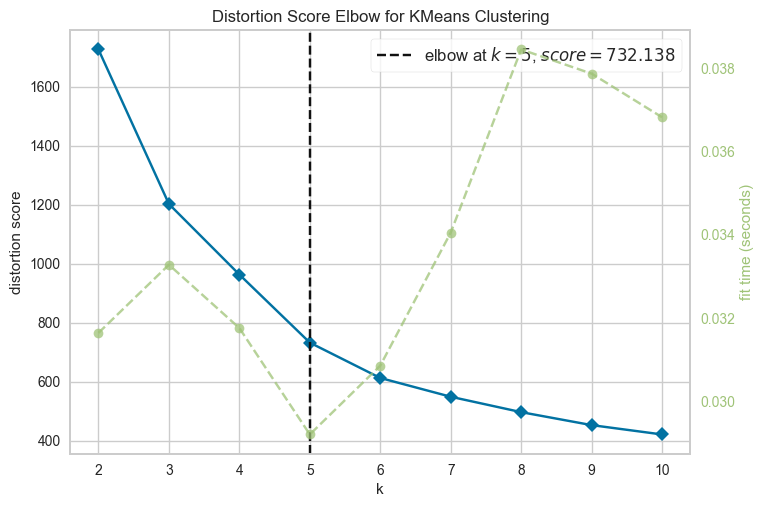

In [195]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

plt.show()

### Make 5 Cluster from parameter Elbow Method

In [196]:
numeric_data = df
# Initialize KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit and predict using KMeans
yhat_AC = kmeans.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"] = yhat_AC
scaled_data["Clusters"] = yhat_AC

### Scoring from my Cluster

In [197]:
silhouette_ac = silhouette_score(PCA_ds, yhat_AC)
print(f"Silhouette Score (K-Means Clustering): {silhouette_ac}")

Silhouette Score (K-Means Clustering): 0.5097072225692122


In [198]:
davies_bouldin_ac = davies_bouldin_score(PCA_ds, yhat_AC)
print(f"Davies-Bouldin Index (K-Means Clustering): {davies_bouldin_ac}")

Davies-Bouldin Index (K-Means Clustering): 0.7385725717519918


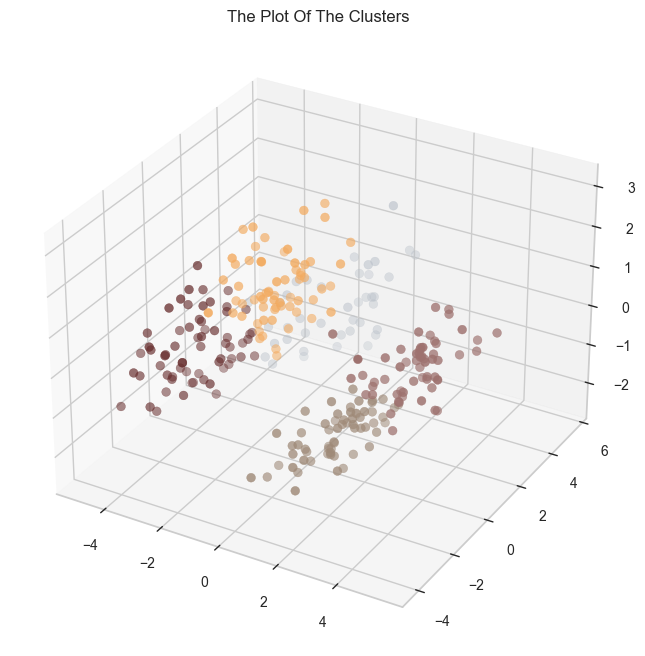

In [199]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

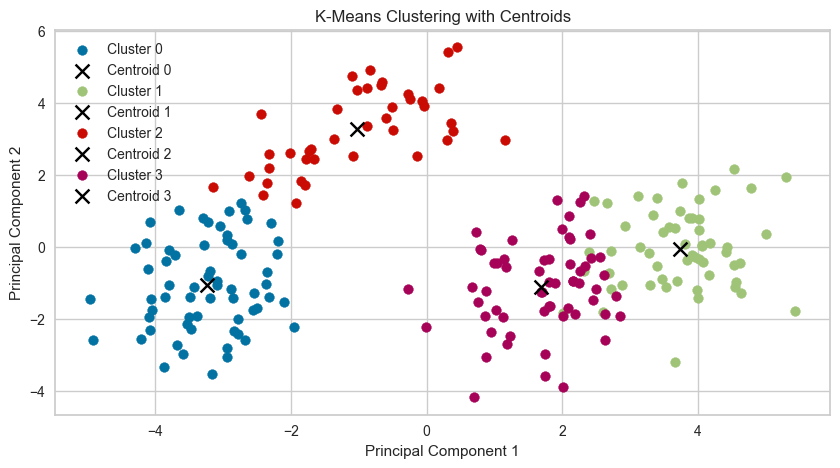

In [200]:
centroids = []
for cluster_id in range(4):  # Adjust this loop range based on your number of clusters
    cluster_points = PCA_ds[PCA_ds["Clusters"] == cluster_id][['col1', 'col2']]
    centroid = cluster_points.mean()
    centroids.append(centroid)

# Create a scatter plot with centroids
plt.figure(figsize=(10, 5))
for cluster_id in range(4):  # Adjust this loop range based on your number of clusters
    cluster_points = PCA_ds[PCA_ds["Clusters"] == cluster_id]
    plt.scatter(cluster_points['col1'], cluster_points['col2'], label=f'Cluster {cluster_id}', )
    centroid = centroids[cluster_id]
    plt.scatter(centroid['col1'], centroid['col2'], marker='x', s=100, c='black', label=f'Centroid {cluster_id}')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Evaluasi Model
We will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.<br>

*Firstly, let us have a look at the group distribution of clustring*

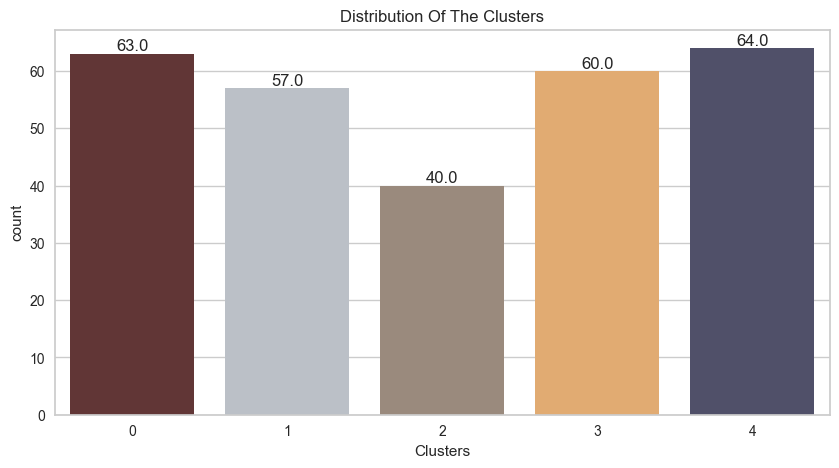

In [201]:
plt.figure(figsize=(10, 5))
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60", "#4C4C6D"]
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")

for bar in pl.patches:
    pl.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom')
plt.show()

The distribution of clusters shows a distinctive pattern, especially noticeable in the size of Cluster 1, Cluster 2, and Cluster 3, which consist of about 40 to 60 penguins each. However, something noteworthy emerges in the form of Cluster 0 and Cluster 4, which have larger numbers of 63 and 64 penguins respectively. This difference in cluster size adds an interesting dimension to the overall structure of the dataset, suggesting the potential for variation or distinct characteristics within certain clusters.

**The cluster profile based on BMI (Body Mass Index) and Culmen Ratio**

Provides valuable insights into the interplay between the weight and beak dimensions of penguins. This analysis seeks to unravel the nuanced relationship, exploring the extent to which penguins exhibit variations in weight relative to their beak structures. This is particularly crucial as certain species may showcase distinctive characteristics, such as pointed beaks coupled with substantial body masses. By scrutinizing the BMI and Culmen Ratio within each cluster, we gain a deeper understanding of the intricate balance and potential divergences in these vital physical attributes among different penguin groups.

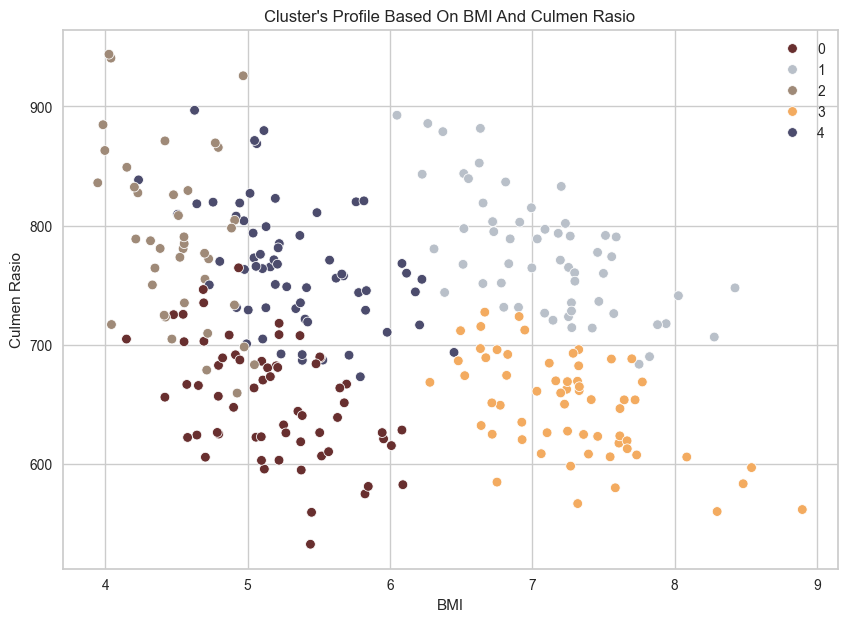

In [202]:
plt.figure(figsize=(10, 7))
pl = sns.scatterplot(data = df,x=df['BMI'], y=df['Culmen Rasio'],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On BMI And Culmen Rasio")
plt.legend()
plt.show()

BMI vs Culmen Rasio plot shows the clusters pattern:

- Group 0: Average BMI & Low Culmen Rasio
- Group 1: High BMI & Average Culmen Rasio
- Group 2: Low BMI & High Culmen Rasio
- Group 3: High BMI & Low Culmen Rasio
- Group 4: Average BMI & Average Culmen Rasio

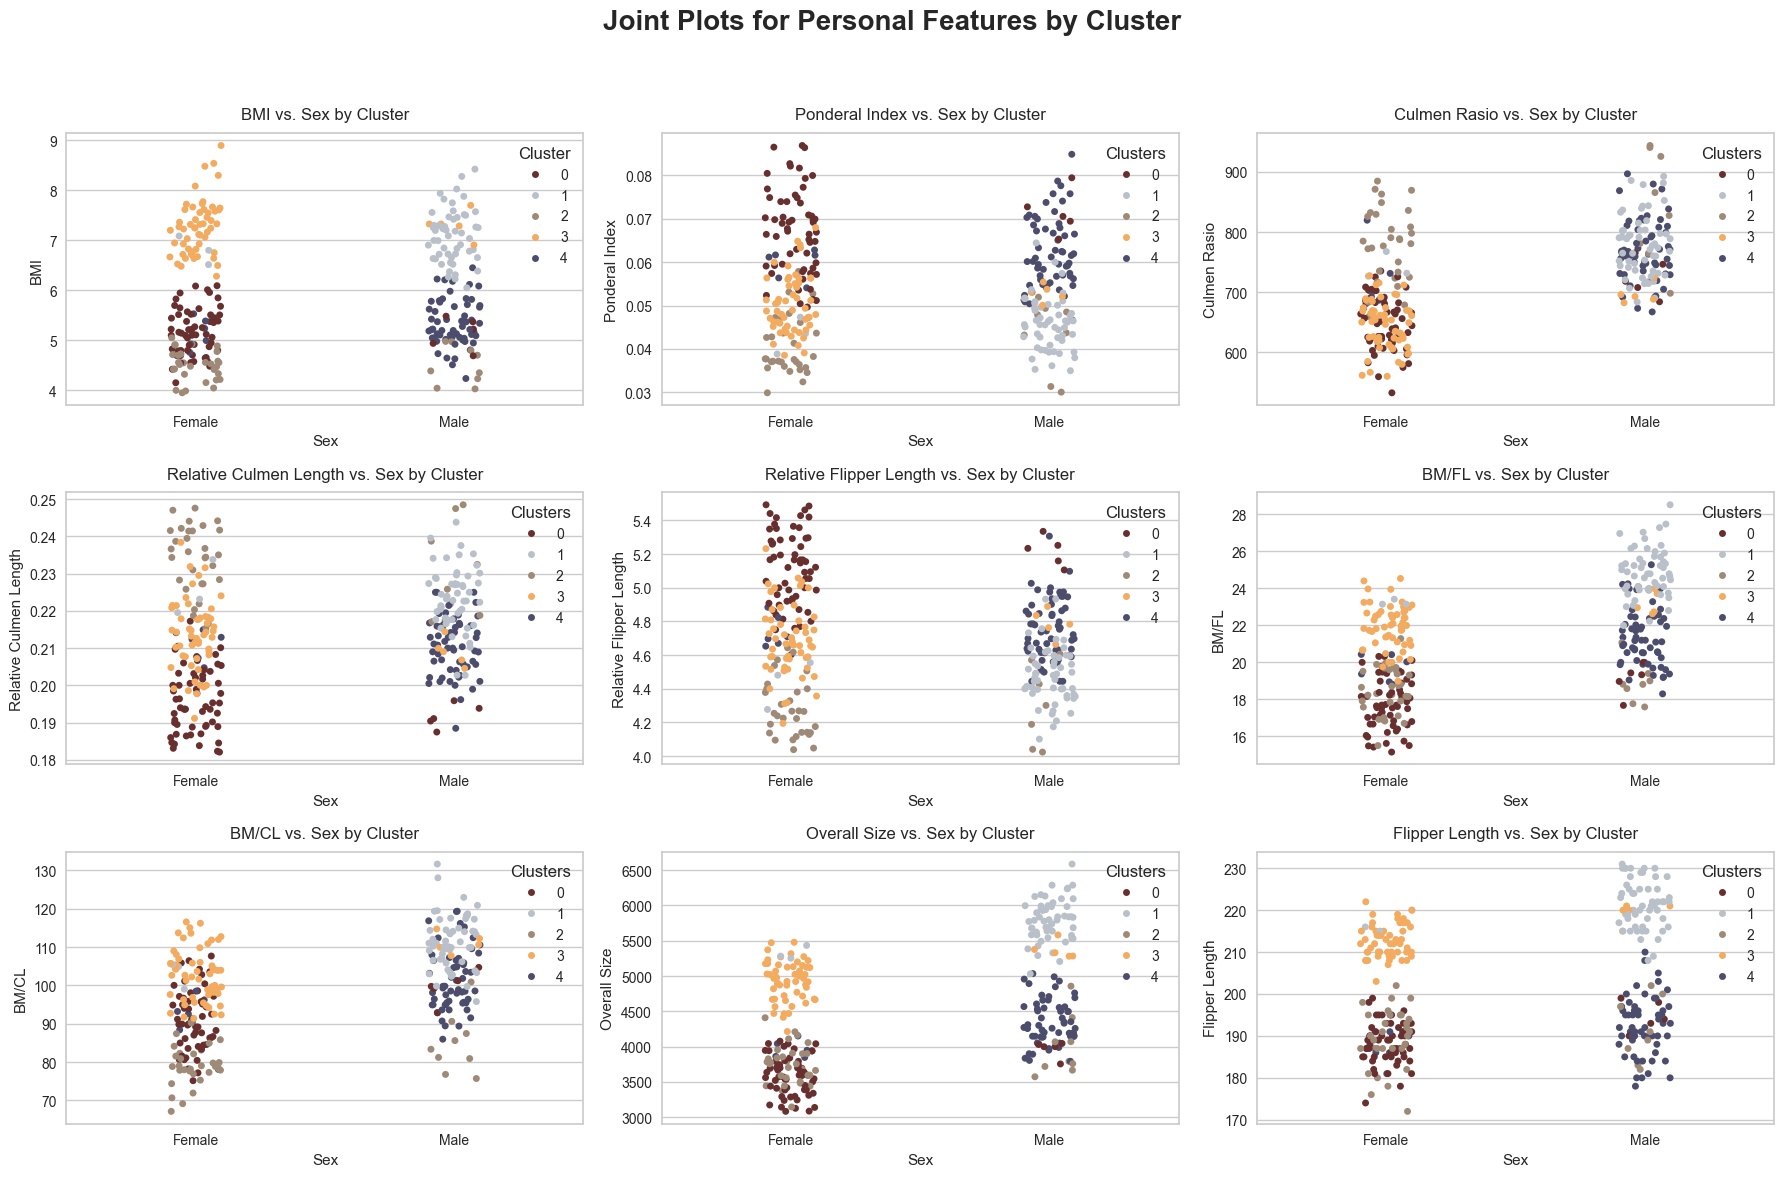

In [203]:
Personal = ["BMI", "Ponderal Index", "Culmen Rasio",
           "Relative Culmen Length", "Relative Flipper Length",
           "BM/FL", "BM/CL", "Overall Size","Flipper Length"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Joint Plots for Personal Features by Cluster", fontsize=20, fontweight='bold')

for i, col in enumerate(Personal):
    row, col_num = divmod(i, 3)

    # Use stripplot for multiple clusters
    sns.stripplot(
        x="Sex",
        y=col,
        hue="Clusters",
        data=df,
        jitter=True,
        marker="o",
        ax=axes[row, col_num],
        palette=pal
    )

    axes[row, col_num].set_title(f"{col} vs. Sex by Cluster", pad=10)
    axes[row, col_num].set_xlabel("Sex")
    axes[row, col_num].set_ylabel(col)

    # Set custom labels for x-axis
    axes[row, col_num].set_xticks([0, 1])
    axes[row, col_num].set_xticklabels(["Female", "Male"])

axes[0, 0].legend(title="Cluster")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


This is an interesting discovery after I plotted between BMI and Culmen Ratio and then I looked at some of the other columns for actual gender sex in the data, not doing a random survey.
1. As in the cluster penguins group with average BMI and low Culmen Ratio, and here I found that many of them have female gander, this means that the data I have shows that females have a relatively small body than males.
2. Looking at the Ponderal Index the species that have a pointed gander on average are female.
3. For females they have a beak size bias, females tend to have relatively long and short beaks for some species of penguins, allowing them to position their eggs with their beaks.

<Figure size 1000x600 with 0 Axes>

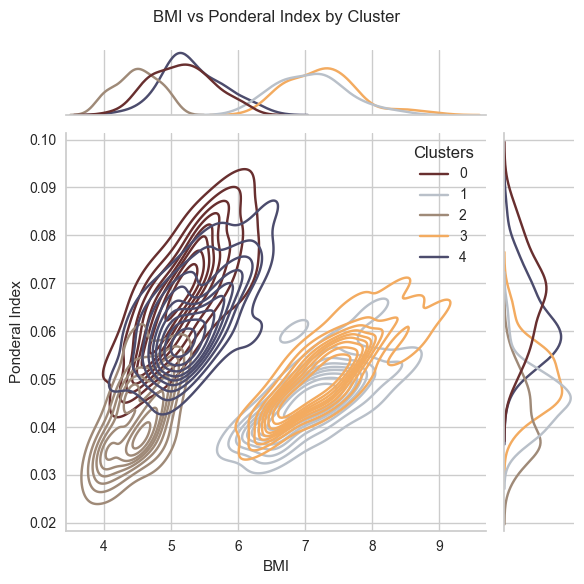

   Clusters       BMI  Ponderal Index
0         0  5.170417        0.067578
1         1  7.086383        0.045697
2         2  4.500445        0.041480
3         3  7.260530        0.050545
4         4  5.328055        0.062021


In [204]:
plt.figure(figsize=(10,6))
plot = sns.jointplot(x=df["BMI"], y=df["Ponderal Index"], hue=df["Clusters"], kind="kde", palette=pal)
plot.ax_marg_x.set_title("BMI vs Ponderal Index by Cluster", pad=20)  
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()
average_values = df.groupby('Clusters')[['BMI', 'Ponderal Index']].mean().reset_index()
print(average_values)

### BMI vs Ponderal Index Analysis <br>
It seems that you are interested in the relationship between the body shape and the adaptation of penguins. Based on your data, I can provide some insights on how the mean BMI and Ponderal Index of different clusters of penguins reflect their structural and behavioral adaptations.

First of all, let me explain what BMI and Ponderal Index are. BMI stands for Body Mass Index, which is a measure of body fat based on height and weight. Ponderal Index is a measure of body shape based on height and mass. It is similar to BMI, but it takes into account the cube root of mass instead of the square of height. A higher Ponderal Index means a slimmer and lighter body shape, while a lower Ponderal Index means a more rounded and dense body shape.<br>

Cluster 0: Characterized by the lowest BMI and a high Ponderal Index, indicating a slim body shape. (Slim)<br>
Cluster 1: Exhibits a high BMI and a low Ponderal Index, suggesting a round body shape. (Round)<br>
Cluster 2: Represents the most minimal values for both BMI and Ponderal Index, portraying an exceptionally slim body shape. (Slim)<br>
Cluster 3: Displays the highest BMI and an average Ponderal Index, signifying a round body shape. (Round)<br>
Cluster 4: Features an average BMI and an average Ponderal Index, reflecting a moderately slim body shape. (Slim)<br>

As evident from the clusters, some penguins (0, 2, and 4) exhibit lower BMI and higher Ponderal Index, indicating a slimmer and lighter body shape. Conversely, clusters 1 and 3 display higher BMI and lower Ponderal Index, suggesting a more rounded and dense body shape.<br>

In the context of penguin adaptation, these body variations align with their survival strategies in icy environments. Penguins have evolved unique adaptations, such as streamlined bodies and thick layers of feathers, to thrive in harsh conditions.<br>

A crucial adaptation is their swimming ability. Penguins with a slimmer body shape (clusters 0, 2, and 4) may have advantages in swimming and diving. Their streamlined form enables faster movement, deeper dives, and enhanced maneuverability. The reduced drag also helps conserve energy and oxygen, contributing to better temperature regulation.<br>

On the other hand, penguins with a more rounded body shape (clusters 1 and 3) benefit from increased insulation and protection. The higher fat and muscle mass, along with abundant feathers, aid in staying warm in cold temperatures. Additional feathers around the bill, as seen in the Adélie penguin, contribute to heat conservation.<br>

In summary, the mean BMI and Ponderal Index across penguin clusters reflect their structural and behavioral adaptations. A slimmer body shape may excel in aquatic activities, while a more rounded shape provides insulation and defense. Penguins' diverse adaptations enable them to thrive in extreme conditions.

<Figure size 1000x600 with 0 Axes>

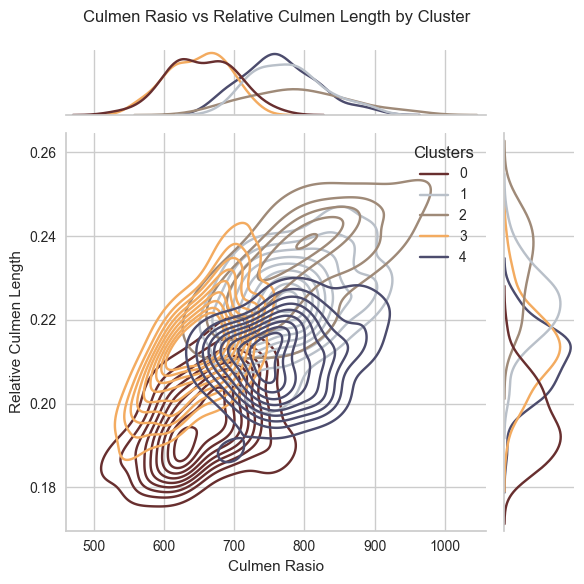

   Clusters  Culmen Rasio  Relative Culmen Length
0         0    653.953492                0.195517
1         1    776.335263                0.223664
2         2    791.249750                0.233034
3         3    648.528667                0.213241
4         4    764.203438                0.210537


In [205]:
plt.figure(figsize=(10,6))
plot = sns.jointplot(x=df['Culmen Rasio'], y=df['Relative Culmen Length'], hue=df["Clusters"], kind="kde", palette=pal)
plot.ax_marg_x.set_title("Culmen Rasio vs Relative Culmen Length by Cluster", pad=20)  
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()
average_values = df.groupby('Clusters')[['Culmen Rasio', 'Relative Culmen Length']].mean().reset_index()
print(average_values)

### Culmen Rasio vs Relative Culmen Length Analysis <br>
First, let me explain what Culmen Ratio and Relative Culmen Length are. Culmen Ratio is a measure of the product of culmen length and depth, while Relative Culmen Length is a measure of the ratio of culmen length to flipper length. These two variables can indicate the shape and size of the penguin’s beak and flippers, which are important for their feeding and swimming abilities.

Penguins have different types of beaks and flippers depending on their diet and habitat. Some penguins have long and narrow beaks that are good for catching fish, while others have short and thick beaks that are good for crushing krill. Some penguins have long and slender flippers that are good for fast and agile swimming, while others have short and broad flippers that are good for maneuvering and diving 
<br>

Cluster 0: This cluster exhibits the lowest Culmen Ratio and Relative Culmen Length, indicating short and thick beaks and short, broad flippers. These traits are typical of penguins that feed on krill and thrive in cold climates, such as the Adélie penguin.<br><br>
Cluster 1: With a high Culmen Ratio and slightly high Relative Culmen Length, this cluster suggests long and narrow beaks and long, slender flippers. These features are characteristic of penguins that feed on fish and inhabit warmer climates, like the Magellanic penguin.
Cluster 2: Displaying the highest Culmen Ratio and Relative Culmen Length, this cluster suggests very long and narrow beaks and very long, slender flippers. These characteristics are typical of penguins that feed on fish and squid, residing in subantarctic regions, such as the king penguin.<br><br>
Cluster 3: Featuring the lowest Culmen Ratio and an average Relative Culmen Length, this cluster suggests short and thick beaks with medium-sized flippers. These traits are typical of penguins with a mixed diet of fish and krill, found in temperate regions, like the Humboldt penguin.<br><br>
Cluster 4: With a high Culmen Ratio and an average Relative Culmen Length, this cluster indicates long and narrow beaks with medium-sized flippers. These features are typical of penguins with a mixed diet of fish and squid, inhabiting subantarctic regions, such as the gentoo penguin.<br>

In conclusion, the mean Culmen Ratio and Relative Culmen Length across penguin clusters reflect their beak and flipper characteristics, crucial for feeding and swimming adaptations. Penguins with a slimmer body shape may excel in fast and agile swimming, while those with a more rounded body shape may have advantages in crushing and digesting krill. The diverse beak and flipper types among penguins are intricately linked to their diets and habitats.<br>


<Figure size 1000x600 with 0 Axes>

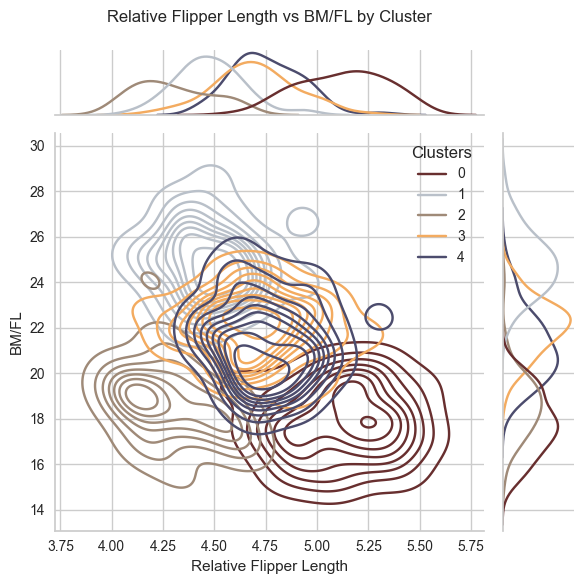

   Clusters  Relative Flipper Length      BM/FL
0         0                 5.123535  17.840476
1         1                 4.477012  24.794866
2         2                 4.298921  18.683657
3         3                 4.698035  22.035180
4         4                 4.755675  21.154763


In [206]:
plt.figure(figsize=(10,6))
plot = sns.jointplot(x=df['Relative Flipper Length'], y=df['BM/FL'], hue=df["Clusters"], kind="kde", palette=pal)
plot.ax_marg_x.set_title("Relative Flipper Length vs BM/FL by Cluster", pad=20)  
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()
average_values = df.groupby('Clusters')[['Relative Flipper Length', 'BM/FL']].mean().reset_index()
print(average_values)

### Relative Flipper Length vs BM/FL Analysis <br>

First, let's delve into the concepts of Relative Flipper Length and BM/FL. Relative Flipper Length represents the ratio of flipper length to culmen length, while BM/FL reflects the ratio of body mass to flipper length. These variables offer insights into the size and shape of penguins' flippers and body mass, crucial for their swimming and thermoregulation abilities.

Penguins exhibit diverse flipper and body mass characteristics based on their habitat and climate. Some possess longer and lighter flippers, ideal for swift and agile swimming, while others have shorter and heavier flippers, facilitating precise maneuvering and diving. Body mass variations range from larger and denser, advantageous for retaining warmth in cold temperatures, to smaller and lighter, beneficial for dissipating heat in warmer climates.

Clusters 0 and 2: Characterized by long, light flippers and small, light bodies, indicating adaptation to warmer climates and agile swimming. These penguins may excel in catching fish and squid, with advantages in evading predators. However, they might face challenges in maintaining warmth and sustaining energy during fasting periods. Examples include the Magellanic penguin and the Galapagos penguin.

Clusters 1 and 3: Feature short, heavy flippers and large, dense bodies, suggesting adaptation to colder climates and slower swimming. These penguins excel in retaining warmth and sustaining energy for breeding but may face challenges in catching prey and evading predators. Examples include the emperor penguin and the Adélie penguin.

Cluster 4: Exhibits medium flippers and bodies, reflecting adaptation to a balanced climate and swimming speed. These penguins have moderate advantages in both thermoregulation and prey capture, as well as a balanced energy profile and agility. Examples include the gentoo penguin and the king penguin.

In conclusion, the mean Relative Flipper Length and BM/FL across penguin clusters reveal their flipper and body mass proportions, intricately linked to their environment and breeding productivity. Penguins with longer, lighter flippers and smaller, lighter bodies may thrive in warmer climates and faster swimming, while those with shorter, heavier flippers and larger, denser bodies may excel in colder climates and slower swimming. Penguins with medium-sized flippers and bodies demonstrate a balanced adaptation to their climate and swimming speed. These variations highlight the diverse adaptations of penguins based on their habitats and climates.

<Figure size 1000x600 with 0 Axes>

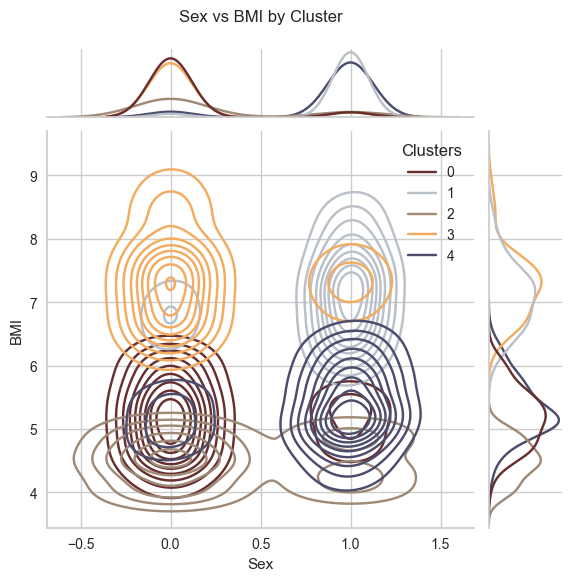

<Figure size 1000x600 with 0 Axes>

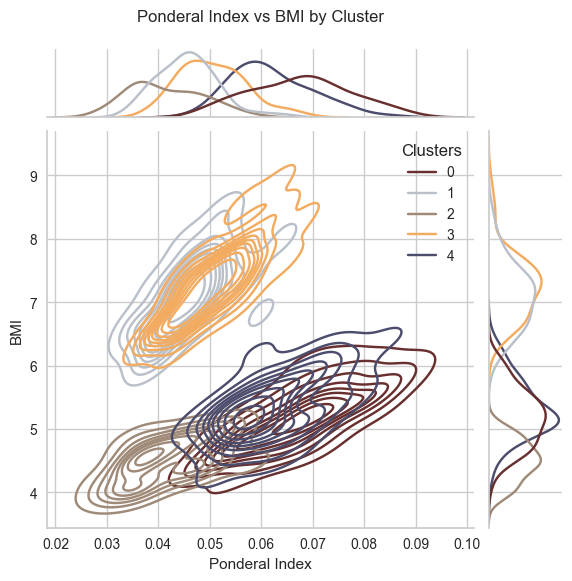

<Figure size 1000x600 with 0 Axes>

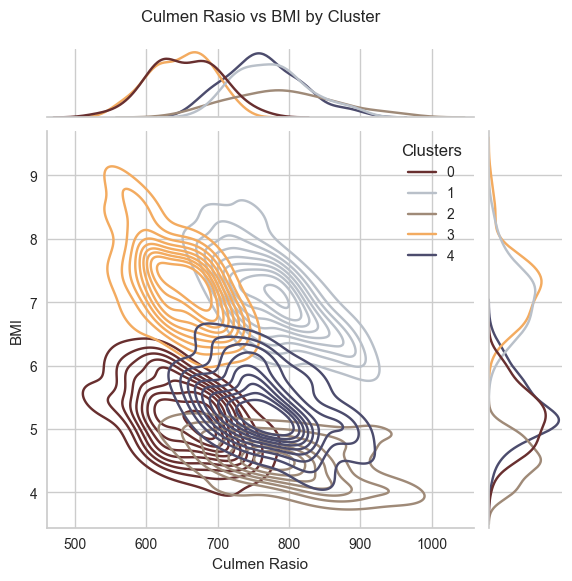

<Figure size 1000x600 with 0 Axes>

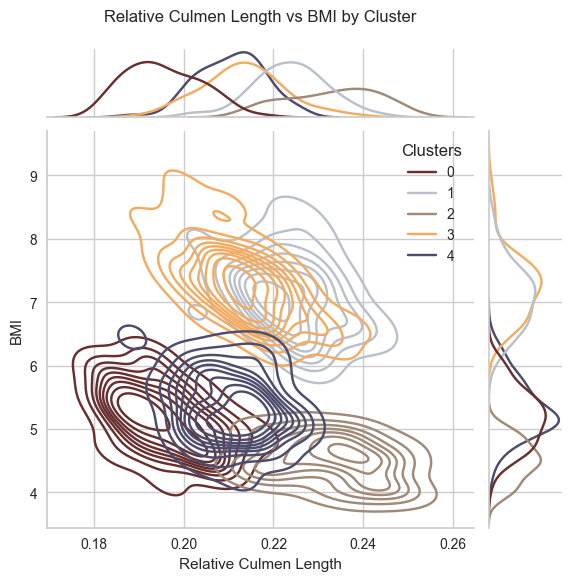

<Figure size 1000x600 with 0 Axes>

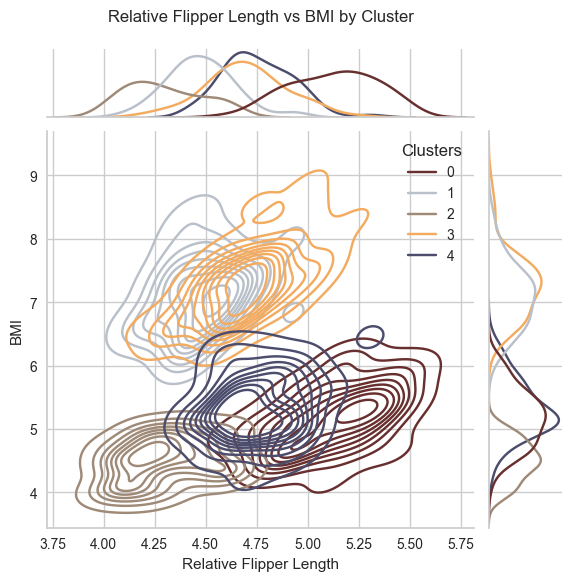

<Figure size 1000x600 with 0 Axes>

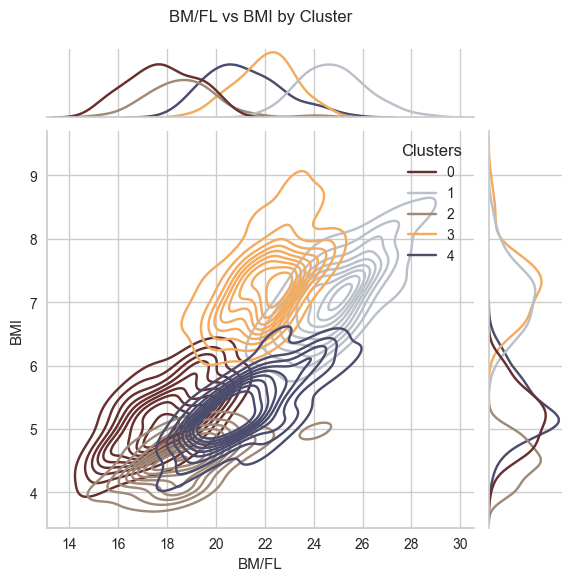

<Figure size 1000x600 with 0 Axes>

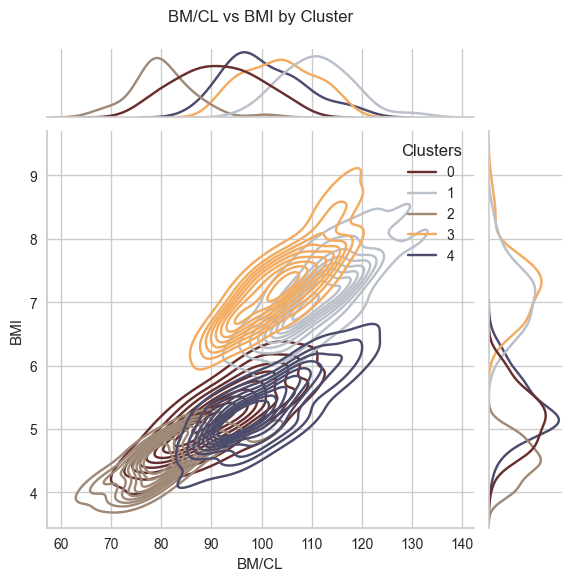

<Figure size 1000x600 with 0 Axes>

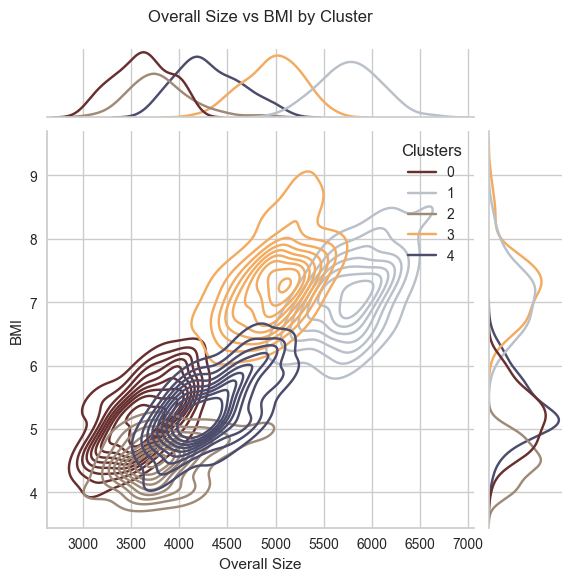

<Figure size 1000x600 with 0 Axes>

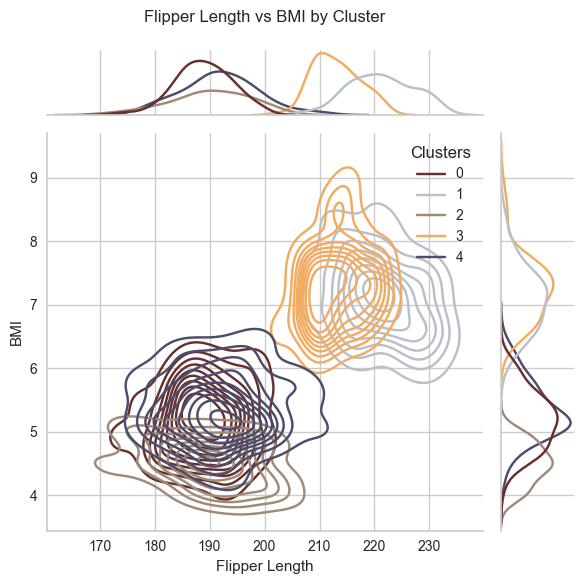

In [207]:
Personal = ["Sex", "Ponderal Index", "Culmen Rasio",
           "Relative Culmen Length", "Relative Flipper Length",
           "BM/FL", "BM/CL", "Overall Size","Flipper Length"]
for col in Personal:
    plt.figure(figsize=(10,6))
    plot = sns.jointplot(x=df[col], y=df["BMI"], hue=df["Clusters"], kind="kde", palette=pal)
    plot.ax_marg_x.set_title(f"{col} vs BMI by Cluster", pad=20)  
    plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()


# Profilling
<img src="Penguins Species Clustering.jpg" width="1000" />